----------------------------------
# Case Study: Factors Influencing Life Expectancy using **Linear Regression**
----------------------------------

## Context: 
    
- There have been lot of studies undertaken in the past, on factors affecting life expectancy, considering demographic variables, income composition and mortality rates.
- It was found that affect of immunization and human development index was not taken into account in the past.
- Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this case study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.
- In this case study, we will use linear regression to see the effect of various factors on Life Expectancy.


## Problem:

**The data-set aims to answer the following key questions:**

- Does various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan?
- Do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- What is the impact of Immunization coverage (for various disease like Measles,Hepatitis B) on life Expectancy?


## Attribute Information:

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression
lrmdl = LinearRegression()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import train_test_split as tts

In [2]:
pd.options.display.float_format = '{:,.4f}'.format
sns.set(color_codes=True)
sns.set_style(style='darkgrid')

In [3]:
df = pd.read_csv('LifeExpectancyData.csv')

In [148]:
df.sort_values(['Country','Year'], inplace=True)

In [4]:
df.rename(columns={'Life expectancy':'LifeExp','Adult Mortality':'AdultMortRatep1000','Infant deaths':'InfantDeathsNump1000',
                   'Percentage expenditure':'PrcntExpendpCap','Hepatitis B':'PrcntImmHepB','Measles':'MeaslesNump1000',
                   'Under-five deaths':'DeathsLess5Nump1000','Polio':'PrcntImmPolio','Total expenditure':'PrcntHealthExpendonTot',
                   'Diphtheria':'PrcntImmDiphth','HIV/AIDS':'HivAidsNump1000','Thinness  1-19 years':'PrcntMalnutr1019',
                   'Thinness 5-9 years':'PrcntMalnutr59','Income composition of resources':'IndexIncmComp'}, inplace=True)

In [8]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
LifeExp                   0
AdultMortRatep1000        0
InfantDeathsNump1000      0
Alcohol                   0
PrcntExpendpCap           0
PrcntImmHepB              0
MeaslesNump1000           0
BMI                       0
DeathsLess5Nump1000       0
PrcntImmPolio             0
PrcntHealthExpendonTot    0
PrcntImmDiphth            0
HivAidsNump1000           0
GDP                       0
Population                0
PrcntMalnutr1019          0
PrcntMalnutr59            0
IndexIncmComp             0
Schooling                 0
dtype: int64

In [6]:
df.drop(df[df.LifeExp.isnull()].index, axis=0, inplace=True)

In [7]:
df.interpolate(method='linear', limit_direction='forward',inplace=True)

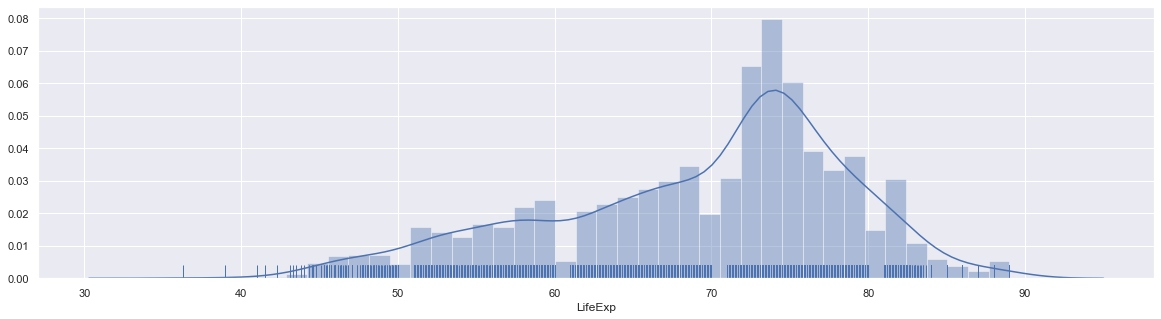

In [9]:
plt.figure(figsize=[20,5])
sns.distplot(df.LifeExp,bins=40,rug=True)
plt.show()

In [10]:
df = pd.get_dummies(df,columns=['Status'])
df.head()

Country  Year  LifeExp  AdultMortRatep1000  InfantDeathsNump1000  \
0  Afghanistan  2015  65.0000            263.0000                    62   
1  Afghanistan  2014  59.9000            271.0000                    64   
2  Afghanistan  2013  59.9000            268.0000                    66   
3  Afghanistan  2012  59.5000            272.0000                    69   
4  Afghanistan  2011  59.2000            275.0000                    71   

   Alcohol  PrcntExpendpCap  PrcntImmHepB  MeaslesNump1000     BMI  ...  \
0   0.0100          71.2796       65.0000             1154 19.1000  ...   
1   0.0100          73.5236       62.0000              492 18.6000  ...   
2   0.0100          73.2192       64.0000              430 18.1000  ...   
3   0.0100          78.1842       67.0000             2787 17.6000  ...   
4   0.0100           7.0971       68.0000             3013 17.2000  ...   

   PrcntImmDiphth  HivAidsNump1000      GDP      Population  PrcntMalnutr1019  \
0         65.0000           0.1000 584.2592 33,736,494.0000           17.2000   
1         62.0000           0.1000 612.6965    327,582.0000           17.5000   
2         64.0000           0.1000 631.7450 31,731,688.0000           17.7000   
3         67.0000           0.1000 669.9590  3,696,958.0000           17.9000   
4         68.0000           0.1000  63.5372  2,978,599.0000           18.2000   

   PrcntMalnutr59  IndexIncmComp  Schooling  Status_Developed  \
0         17.3000         0.4790    10.1000                 0   
1         17.5000         0.4760    10.0000                 0   
2         17.7000         0.4700     9.9000                 0   
3         18.0000         0.4630     9.8000                 0   
4         18.2000         0.4540     9.5000                 0   

   Status_Developing  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 23 columns]

In [173]:
df.describe().transpose()

count            mean             std        min  \
Year                   2,928.0000      2,007.5000          4.6106 2,000.0000   
LifeExp                2,928.0000         69.2249          9.5239    36.3000   
AdultMortRatep1000     2,928.0000        164.7964        124.2921     1.0000   
InfantDeathsNump1000   2,928.0000         30.4074        118.1144     0.0000   
Alcohol                2,928.0000          4.5976          4.0046     0.0100   
PrcntExpendpCap        2,928.0000        740.3212      1,990.9306     0.0000   
PrcntImmHepB           2,928.0000         78.1462         25.2643     1.0000   
MeaslesNump1000        2,928.0000      2,427.8559     11,485.9709     0.0000   
BMI                    2,928.0000         38.3085         19.8931     1.0000   
DeathsLess5Nump1000    2,928.0000         42.1793        160.7005     0.0000   
PrcntImmPolio          2,928.0000         82.4325         23.4149     3.0000   
PrcntHealthExpendonTot 2,928.0000          5.9195          2.4336     0.3700   
PrcntImmDiphth         2,928.0000         82.2029         23.7042     2.0000   
HivAidsNump1000        2,928.0000          1.7477          5.0855     0.1000   
GDP                    2,928.0000      7,380.6756     13,879.7281     1.6813   
Population             2,928.0000 12,661,005.9868 55,801,434.7665    34.0000   
PrcntMalnutr1019       2,928.0000          4.8624          4.4192     0.1000   
PrcntMalnutr59         2,928.0000          4.8947          4.5060     0.1000   
IndexIncmComp          2,928.0000          0.6364          0.2095     0.0000   
Schooling              2,928.0000         12.1021          3.3008     0.0000   
Status_Developed       2,928.0000          0.1749          0.3799     0.0000   
Status_Developing      2,928.0000          0.8251          0.3799     0.0000   

                                25%            50%            75%  \
Year                     2,003.7500     2,007.5000     2,011.2500   
LifeExp                     63.1000        72.1000        75.7000   
AdultMortRatep1000          74.0000       144.0000       228.0000   
InfantDeathsNump1000         0.0000         3.0000        22.0000   
Alcohol                      0.9700         3.7750         7.6425   
PrcntExpendpCap              4.8540        65.6115       442.6143   
PrcntImmHepB                70.3958        89.0000        96.0000   
MeaslesNump1000              0.0000        17.0000       362.2500   
BMI                         19.4000        43.4500        56.1000   
DeathsLess5Nump1000          0.0000         4.0000        28.0000   
PrcntImmPolio               77.0000        93.0000        97.0000   
PrcntHealthExpendonTot       4.2900         5.7600         7.4325   
PrcntImmDiphth              78.0000        93.0000        97.0000   
HivAidsNump1000              0.1000         0.1000         0.8000   
GDP                        474.1211     2,112.4763     5,887.2780   
Population             288,894.3088 1,555,756.5000 7,308,627.5000   
PrcntMalnutr1019             1.6000         3.4000         7.2000   
PrcntMalnutr59               1.6000         3.4000         7.2000   
IndexIncmComp                0.5040         0.6860         0.7880   
Schooling                   10.2750        12.5000        14.3000   
Status_Developed             0.0000         0.0000         0.0000   
Status_Developing            1.0000         1.0000         1.0000   

                                      max  
Year                           2,015.0000  
LifeExp                           89.0000  
AdultMortRatep1000               723.0000  
InfantDeathsNump1000           1,800.0000  
Alcohol                           17.8700  
PrcntExpendpCap               19,479.9116  
PrcntImmHepB                      99.0000  
MeaslesNump1000              212,183.0000  
BMI                               77.6000  
DeathsLess5Nump1000            2,500.0000  
PrcntImmPolio                     99.0000  
PrcntHealthExpendonTot            17.6000  
PrcntImmDiphth             

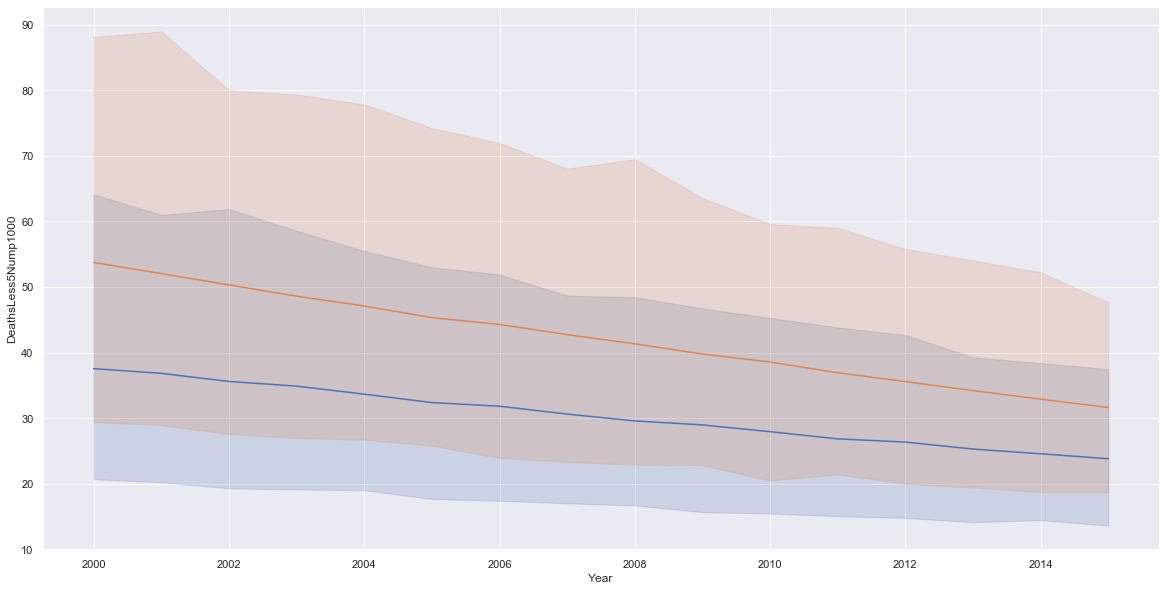

In [179]:
plt.figure(figsize=[20,10])
sns.lineplot(x='Year', y='InfantDeathsNump1000', data=df[['Country','Year','InfantDeathsNump1000','DeathsLess5Nump1000']])
sns.lineplot(x='Year', y='DeathsLess5Nump1000', data=df[['Country','Year','InfantDeathsNump1000','DeathsLess5Nump1000']])
plt.show()

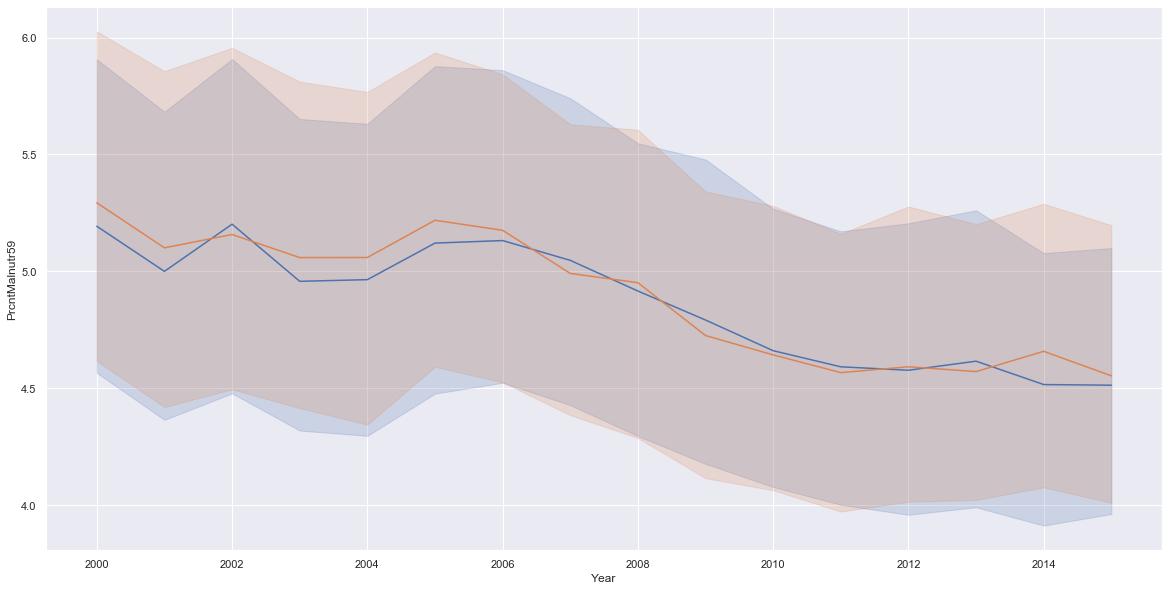

In [180]:
plt.figure(figsize=[20,10])
sns.lineplot(x='Year', y='PrcntMalnutr1019', data=df[['Country','Year','PrcntMalnutr1019','PrcntMalnutr59']])
sns.lineplot(x='Year', y='PrcntMalnutr59', data=df[['Country','Year','PrcntMalnutr1019','PrcntMalnutr59']])
plt.show()

In [201]:
# dfCLE = df.groupby('Country',as_index=False)['LifeExp'].agg(
#     ['min','mean','median','max']).rename(
#     columns={'min':'minLE','mean':'meanLE','median':'medianLE','max':'maxLE'}).reset_index()

In [28]:
dfd3 = df.drop(['Status_Developing','InfantDeathsNump1000','PrcntMalnutr59'],axis=1).copy()

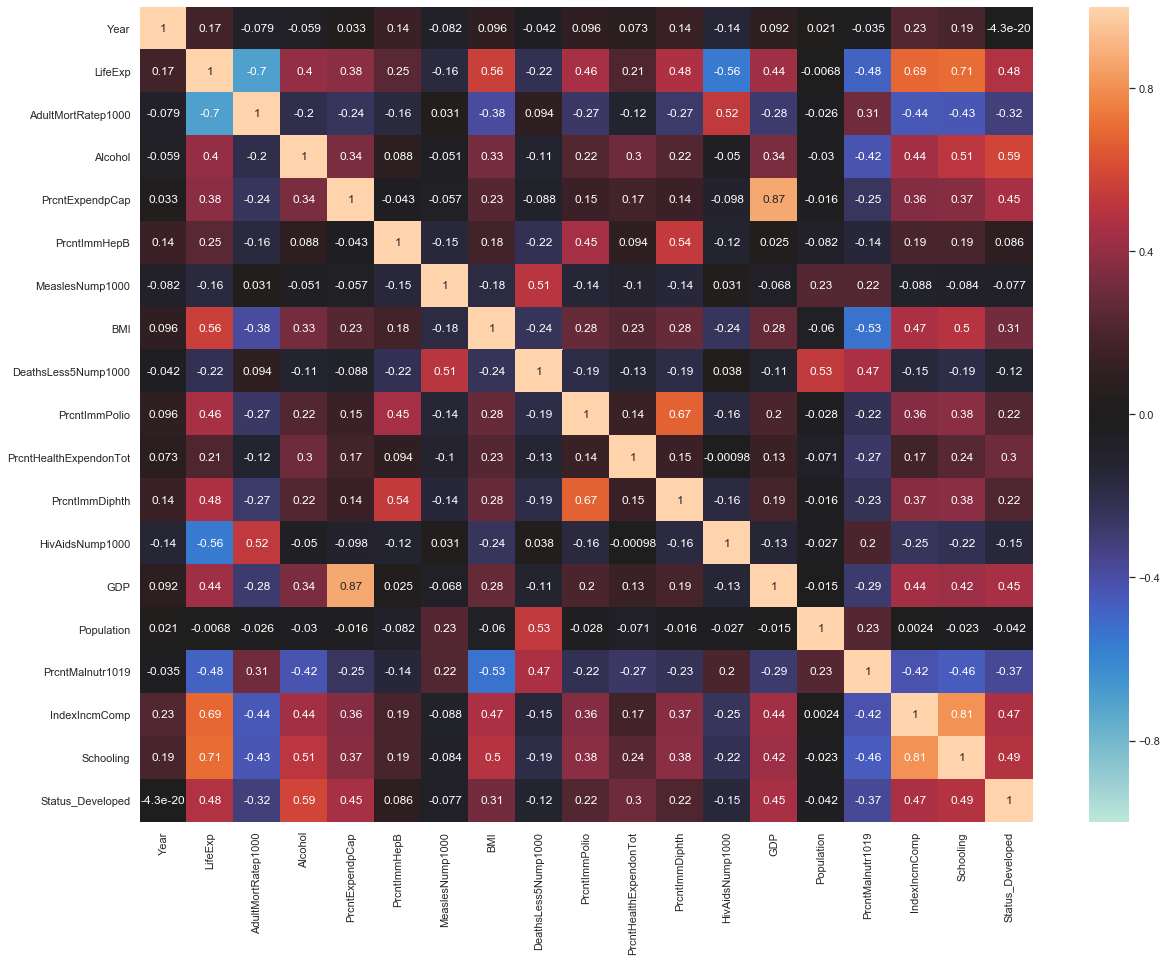

In [12]:
plt.figure(figsize=[20,15])
sns.heatmap(dfd3.corr(),annot=True,vmin=-1, vmax=1,center=0)
plt.show()

<Figure size 1440x1080 with 0 Axes>

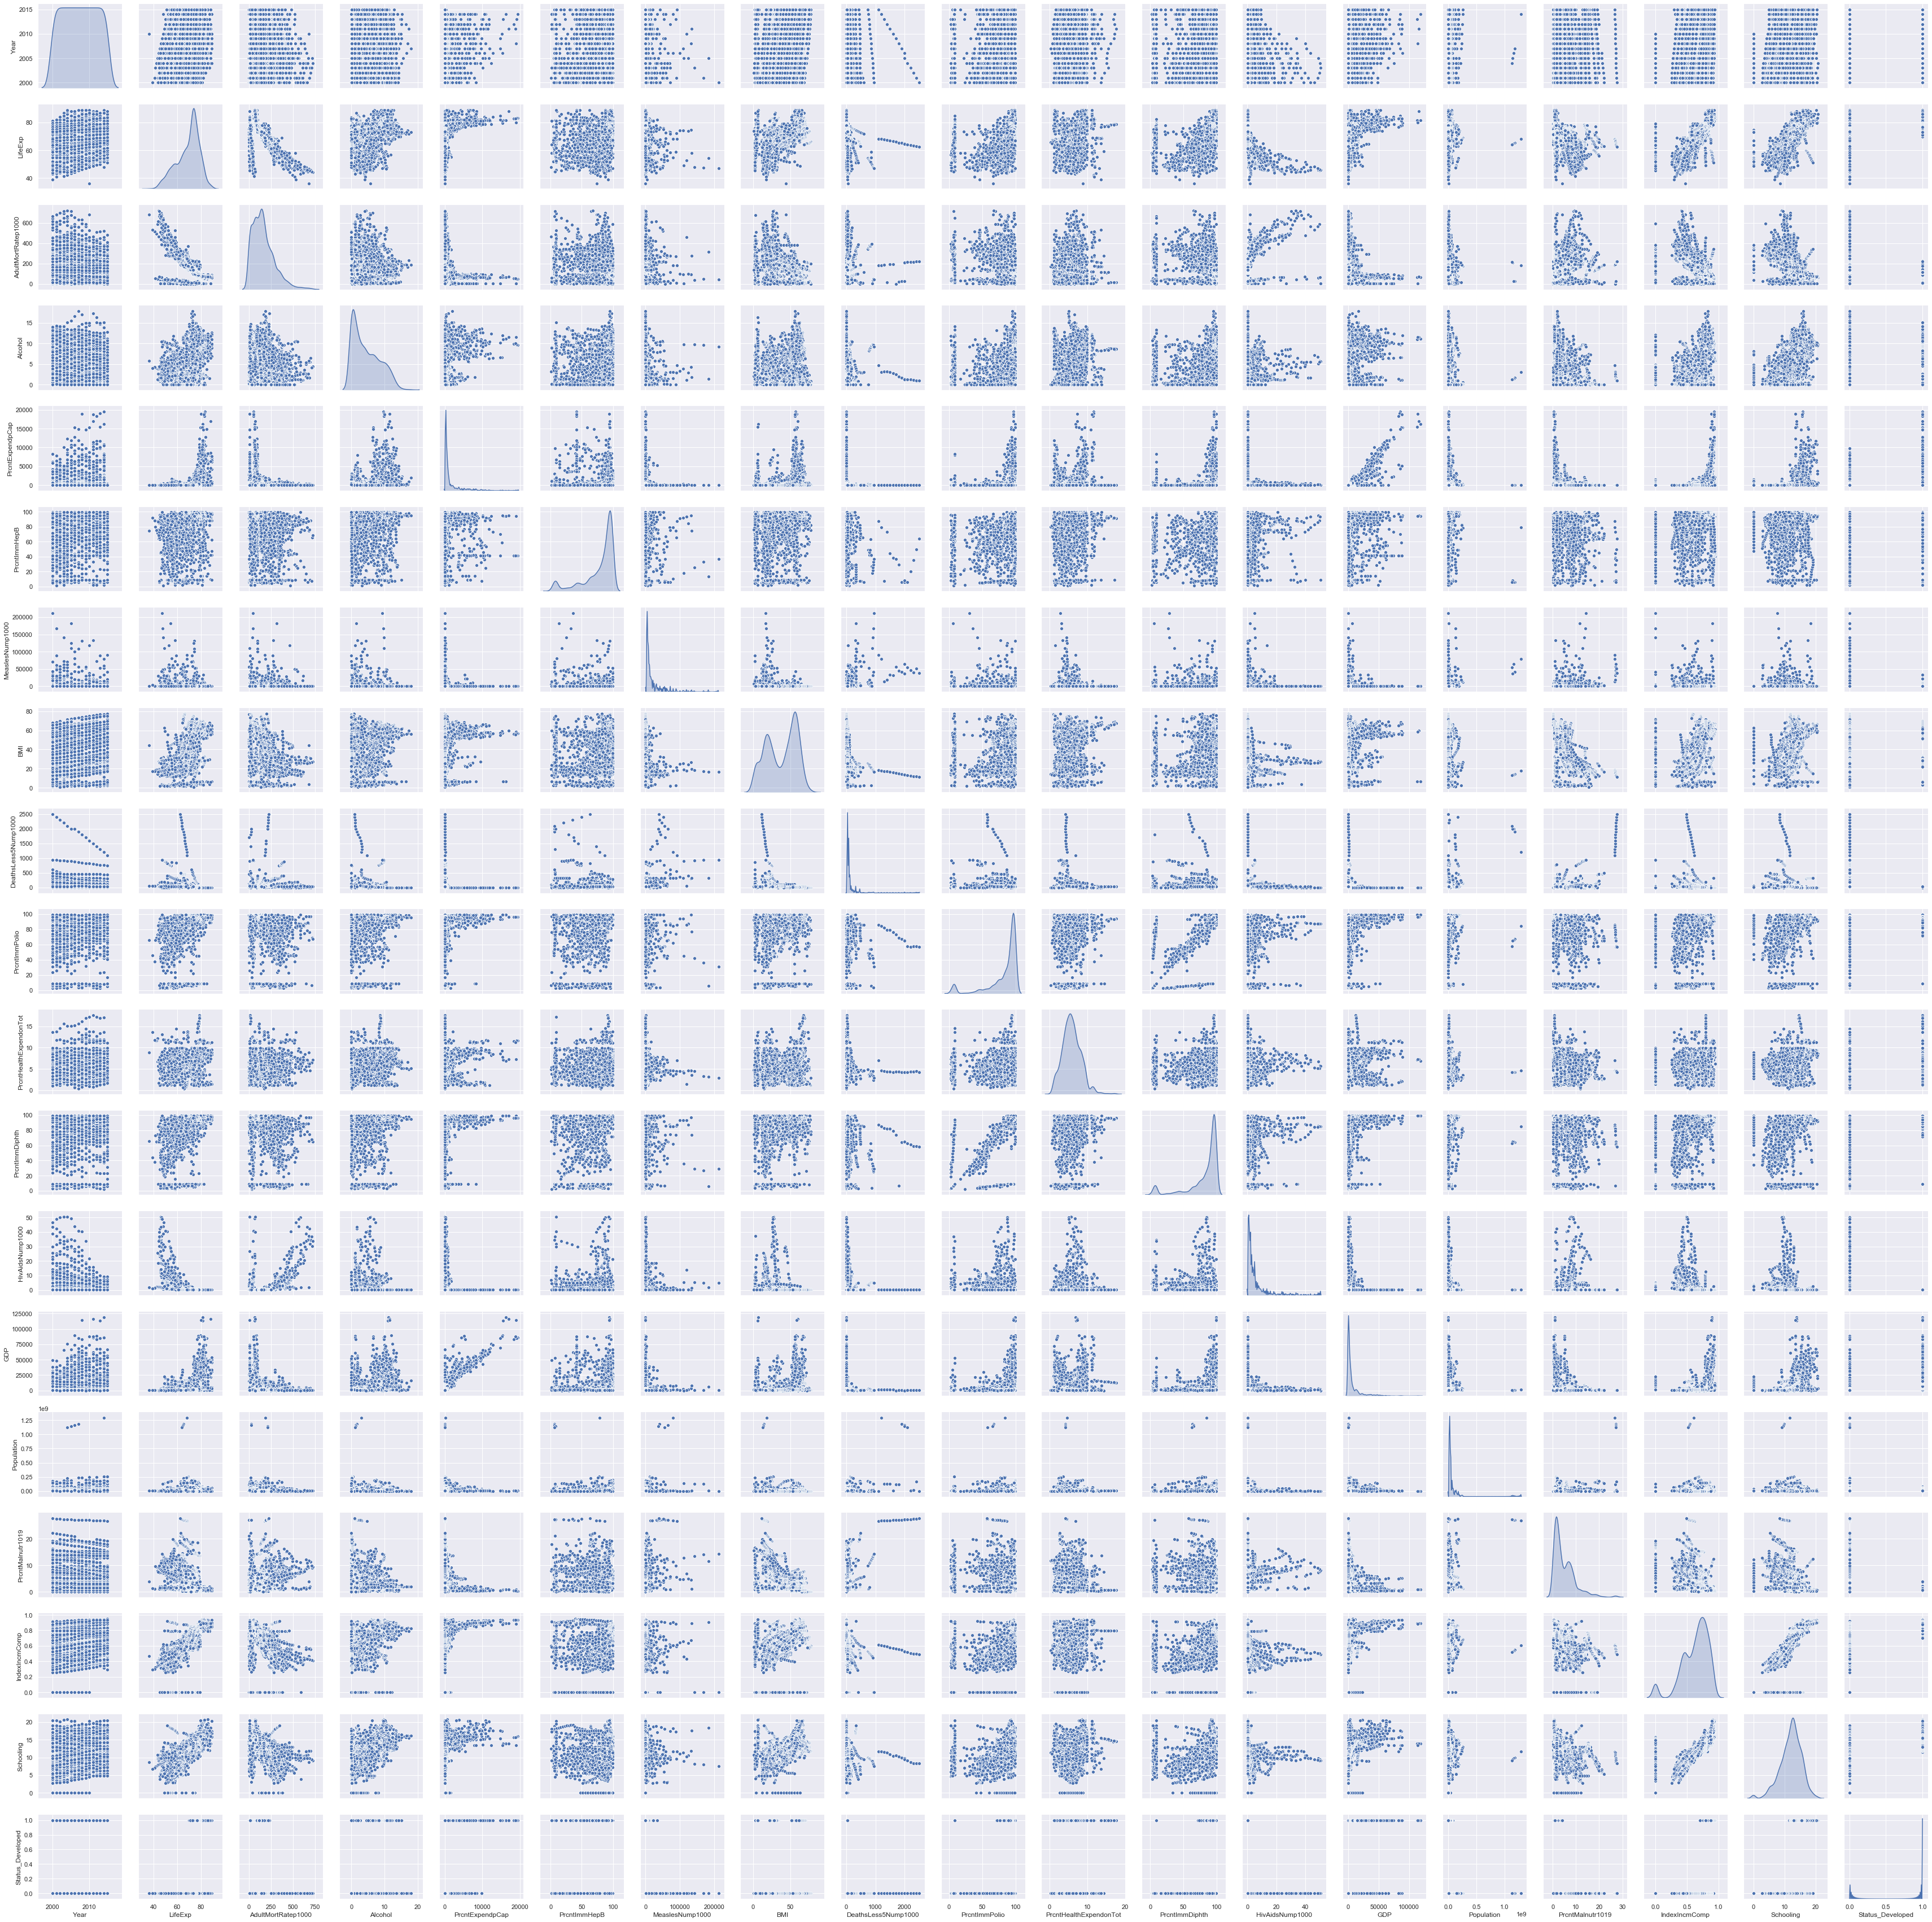

In [16]:
plt.figure(figsize=[20,15])
sns.pairplot(dfd3, diag_kind='kde')
plt.show()


# 5,7,9,13,14,15

In [34]:
dfd3 = pd.get_dummies(dfd3,columns=['Country'])


dfy = dfd3[['LifeExp']]
dfX = dfd3.drop('LifeExp', axis=1).copy()

In [41]:
dfX.describe().transpose()


count            mean  \
Year                                               2,928.0000      2,007.5000   
AdultMortRatep1000                                 2,928.0000        164.7964   
Alcohol                                            2,928.0000          4.5653   
PrcntExpendpCap                                    2,928.0000        740.3212   
PrcntImmHepB                                       2,928.0000         78.3414   
MeaslesNump1000                                    2,928.0000      2,427.8559   
BMI                                                2,928.0000         38.2085   
DeathsLess5Nump1000                                2,928.0000         42.1793   
PrcntImmPolio                                      2,928.0000         82.4725   
PrcntHealthExpendonTot                             2,928.0000          5.9276   
PrcntImmDiphth                                     2,928.0000         82.2432   
HivAidsNump1000                                    2,928.0000          1.7477   
GDP                                                2,928.0000      7,453.3075   
Population                                         2,928.0000 12,312,090.9026   
PrcntMalnutr1019                                   2,928.0000          4.8952   
IndexIncmComp                                      2,928.0000          0.6346   
Schooling                                          2,928.0000         12.0833   
Status_Developed                                   2,928.0000          0.1749   
Country_Afghanistan                                2,928.0000          0.0055   
Country_Albania                                    2,928.0000          0.0055   
Country_Algeria                                    2,928.0000          0.0055   
Country_Angola                                     2,928.0000          0.0055   
Country_Antigua and Barbuda                        2,928.0000          0.0055   
Country_Argentina                                  2,928.0000          0.0055   
Country_Armenia                                    2,928.0000          0.0055   
Country_Australia                                  2,928.0000          0.0055   
Country_Austria                                    2,928.0000          0.0055   
Country_Azerbaijan                                 2,928.0000          0.0055   
Country_Bahamas                                    2,928.0000          0.0055   
Country_Bahrain                                    2,928.0000          0.0055   
...                                                       ...             ...   
Country_Sudan                                      2,928.0000          0.0055   
Country_Suriname                                   2,928.0000          0.0055   
Country_Swaziland                                  2,928.0000          0.0055   
Country_Sweden                                     2,928.0000          0.0055   
Country_Switzerland                                2,928.0000          0.0055   
Country_Syrian Arab Republic                       2,928.0000          0.0055   
Country_Tajikistan                                 2,928.0000          0.0055   
Country_Thailand                                   2,928.0000          0.0055   
Country_The former Yugoslav republic of Macedonia  2,928.0000          0.0055   
Country_Timor-Leste                                2,928.0000          0.0055   
Country_Togo                                       2,928.0000          0.0055   
Country_Tonga                                      2,928.0000          0.0055   
Country_Trinidad and Tobago                        2,928.0000          0.0055   
Country_Tunisia                                    2,928.0000          0.0055   
Country_Turkey                                     2,928.0000          0.0055   
Country_Turkmenistan                               2,928.0000          0.0055   
Country_Uganda                                     2,928.0000          0.0055   
Country_Ukraine                                    2,928.0000          0.0055   
Countr

In [44]:
dfy.describe().transpose()

count    mean    std     min     25%     50%     75%     max
LifeExp 2,928.0000 69.2249 9.5239 36.3000 63.1000 72.1000 75.7000 89.0000

In [60]:
X_train, X_test, y_train, y_test = tts(dfX, dfy, test_size=0.3,random_state=1)

In [61]:

lrmdl.fit(X_train, y_train)

print("Coeff : ",lrmdl.coef_)
print("Intercept : ", lrmdl.intercept_)

r2 = lrmdl.score(X_train, y_train)
print("R2 Score : ", r2)


Coeff :  [[ 2.59880615e-01 -1.70694818e-03 -9.26431081e-02  1.98117843e-04
  -5.91412296e-03 -1.44649900e-05 -2.60743162e-03 -3.73638064e-03
   4.72177135e-03 -4.58864292e-02  8.01928648e-03 -3.67006672e-01
  -3.18608630e-05  1.91935967e-10  1.15789795e-02  2.08131420e-01
   1.33306724e-01  1.05604120e+01 -8.90116219e+00  6.79428215e+00
   4.85023869e+00 -1.64499063e+01  7.54731601e+00  6.58382621e+00
   4.96859729e+00  2.47572561e+00  2.89990951e+00  2.19375134e+00
   6.82046584e+00  6.87447517e+00  8.23019143e-01  6.14459524e+00
   2.13865053e+00  1.39749222e+00  1.30189341e+00 -9.62022909e+00
  -1.72954097e+00 -1.13219351e+00  7.70114461e+00 -5.98787147e+00
   5.31100126e+00  7.57986513e+00 -5.51613007e+00 -1.07261008e+01
  -1.03524595e+01  4.25155773e+00 -3.64120429e+00 -1.10504317e+01
   1.30813013e+01 -1.50889004e+01 -1.53885232e+01  1.09057946e+01
   8.23611360e+00  5.13133211e+00 -6.68955886e+00 -6.71082075e+00
   1.00538255e+01 -2.33550565e+00  9.28737022e+00  1.43900750e+00
 

In [62]:
r2T = lrmdl.score(X_test, y_test)
print("R2 Score : ", r2T)

R2 Score :  0.9591842728723967


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = lrmdl.predict(X_test)
mean_absolute_error(y_test, pred)

1.2413842608662162

In [64]:
mean_squared_error(y_test, pred)**0.5

1.8981060194932569

In [65]:
np.sqrt(mean_squared_error(y_test, pred))

1.8981060194932569

In [68]:
r2_score(y_test, pred)

0.9591842728723967

In [71]:
import statsmodels.api as SM

X = SM.add_constant(X_train)

linearmodel = SM.OLS(y_train, X).fit()

predictions = linearmodel.predict(X) 

print_model = linearmodel.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                LifeExp   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     246.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:20:34   Log-Likelihood:                -4141.8
No. Observations:                2049   AIC:                             8684.
Df Residuals:                    1849   BIC:                             9809.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------